In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
kto_201001 = pd.read_excel('./files/kto_201001.xlsx',header=1,skipfooter=4,usecols='A:G')
kto_201001

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537


In [23]:
tail_201001=pd.read_excel('./files/kto_201001.xlsx',header=1,usecols='A:G').tail(4)
tail_201001.index=tail_201001['국적']
del tail_201001['국적']
tail_201001.index.name='요약'
tail_201001

,관광,상용,공용,유학/연수,기타,계
요약,,,,,,
계,400818.0,22896.0,2738.0,5118.0,137883.0,569453.0
전년동기,441688.0,20545.0,2764.0,4876.0,137786.0,607659.0
성장률(%),-9.3,11.4,-0.9,5.0,0.1,-6.3
구성비(%),70.4,4.0,0.5,0.9,24.2,100.0


In [33]:
kto_201001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
국적       67 non-null object
관광       67 non-null int64
상용       67 non-null int64
공용       67 non-null int64
유학/연수    67 non-null int64
기타       67 non-null int64
계        67 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [34]:
kto_201001.isnull().sum()

국적       0
관광       0
상용       0
공용       0
유학/연수    0
기타       0
계        0
dtype: int64

In [35]:
kto_201001.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


In [39]:
condition = (kto_201001.iloc[:,1]==0)|(kto_201001.iloc[:,2]==0)|(kto_201001.iloc[:,3]==0)|(kto_201001.iloc[:,4]==0)
kto_201001[condition]

,국적,관광,상용,공용,유학/연수,기타,계
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
6,말레이시아,3292,61,0,49,1157,4559
16,캄보디아,102,22,0,25,131,280
19,이란,69,309,0,3,217,598
20,이스라엘,792,11,0,0,53,856
24,GCC,223,134,0,18,55,430
38,스위스,512,30,0,7,77,626
40,덴마크,378,28,0,5,94,505
41,노르웨이,517,274,0,6,149,946


In [38]:
kto_201001.loc[:,'관광']

0     329131
1     202825
2      35788
3      13874
4        554
       ...  
62       349
63        10
64        10
65         0
66         0
Name: 관광, Length: 67, dtype: int64

In [40]:
# 새 컬럼 추가
kto_201001['기준년월']='2010-01'

In [45]:
# 국적별 분류
kto_201001['국적'].unique()        # unique를 pd.Series객체에 사용할 수 있다는 것 기억

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [46]:
# 대륙으로 묶인 통계는 제외
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']

condition = (kto_201001['국적'].isin(continent_list)==False)
kto_201001_country = kto_201001[condition]
kto_201001_country['국적']

1           일본
2           대만
3           홍콩
4          마카오
5           태국
6        말레이시아
7          필리핀
8        인도네시아
9         싱가포르
10         미얀마
11         베트남
12          인도
13        스리랑카
14        파키스탄
15       방글라데시
16        캄보디아
17          몽골
18          중국
19          이란
20        이스라엘
21          터키
22      우즈베키스탄
23       카자흐스탄
24         GCC
25      아시아 기타
27          미국
28         캐나다
29         멕시코
30         브라질
31       미주 기타
33          영국
34          독일
35         프랑스
36        네덜란드
37         스웨덴
38         스위스
39        이탈리아
40         덴마크
41        노르웨이
42         벨기에
43       오스트리아
44         스페인
45         그리스
46        포르투갈
47         핀란드
48        아일랜드
49       우크라이나
50         러시아
51       크로아티아
52        루마니아
53        불가리아
54         폴란드
55       구주 기타
57     오스트레일리아
58        뉴질랜드
59      대양주 기타
61    남아프리카공화국
62     아프리카 기타
64        국적미상
66          교포
Name: 국적, dtype: object

In [55]:
kto_201001_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01
5,태국,13374,39,13,53,4335,17814,2010-01


In [60]:
# 인덱스를 새롭게. reset_index를 사용하면 인덱스 값을 0부터 순차적으로 다시 초기화, 
# drop=True가 없으면 기존 인덱스 값이 새로운 컬럼으로 생성(reset_index로 새 인덱스 만들고 drop은 기존 인덱스를 버리라는 뜻)

kto_201001_country_newindex = kto_201001_country.reset_index(drop=True)   # reset_index(drop) 기억
kto_201001_country_newindex.iloc[3:6,:]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
3,마카오,554,0,0,0,0,554,2010-01
4,태국,13374,39,13,53,4335,17814,2010-01
5,말레이시아,3292,61,0,49,1157,4559,2010-01


In [61]:
# 대륙 컬럼 만들기. 이건 생각을 해서 어떻게 넣어줄지 전략을 세워야함.

# 아시아:25개국, 미주:5개국, 구주:23개국, 대양주:3개국, 아프리카주:2개국, 기타대륙:1개, 교포소계:1개 
# --> 엑셀을 직접 보고 분석한 것
continent_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [63]:
# 리스트간 더하면 이어붙이기 된다. 리스트는 곱하기와 더하기 연산이 가능하니 잘 써먹도록 합시다.

continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타']+['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타', '교포']


In [68]:
kto_201001_country_newindex['대륙'] = continents
kto_201001_country_newindex.iloc[19:28,:]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
19,이스라엘,792,11,0,0,53,856,2010-01,아시아
20,터키,472,15,2,15,465,969,2010-01,아시아
21,우즈베키스탄,190,293,17,40,740,1280,2010-01,아시아
22,카자흐스탄,238,48,4,22,107,419,2010-01,아시아
23,GCC,223,134,0,18,55,430,2010-01,아시아
24,아시아 기타,700,629,14,56,333,1732,2010-01,아시아
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카
26,캐나다,4912,96,4,21,3743,8776,2010-01,아메리카
27,멕시코,252,29,1,4,93,379,2010-01,아메리카


In [70]:
# 국적별 관광객 비율 살펴보기

kto_201001_country_newindex['관광객비율(%)'] = \
round(kto_201001_country_newindex['관광']/kto_201001_country_newindex['계']*100,1)   # 1하면 소수점 1째 자리까지 나타냄
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


In [71]:
kto_201001_country_newindex.sort_values(by='관광객비율(%)',ascending=False).head()

# 기억 : sort_values(by, ascending)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
19,이스라엘,792,11,0,0,53,856,2010-01,아시아,92.5


In [72]:
kto_201001_country_newindex.sort_values(by='관광객비율(%)',ascending=False).tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
14,방글라데시,86,84,9,42,489,710,2010-01,아시아,12.1
18,이란,69,309,0,3,217,598,2010-01,아시아,11.5
13,파키스탄,70,200,1,41,402,714,2010-01,아시아,9.8
12,스리랑카,39,28,2,13,566,648,2010-01,아시아,6.0
59,교포,0,0,0,0,22537,22537,2010-01,교포,0.0


- 대체로 소득수준이 낮은 나라는 관광목적 비율이 낮음

In [74]:
# 아래 두 개는 대륙별로 관광객 비율을 요약한 것

kto_201001_country_newindex.pivot_table(values='관광객비율(%)',index='대륙',aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타,76.900000
아메리카,60.760000
아시아,49.544000
아프리카,26.550000
오세아니아,79.733333
유럽,60.926087


In [77]:
pd.DataFrame(kto_201001_country_newindex.groupby('대륙')['관광객비율(%)'].mean())

,관광객비율(%)
대륙,
교포,0.000000
기타,76.900000
아메리카,60.760000
아시아,49.544000
아프리카,26.550000
오세아니아,79.733333
유럽,60.926087


In [82]:
china = kto_201001_country_newindex[kto_201001_country_newindex['국적']=='중국']
china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3


In [81]:
# 2010년 1월에 우리나라를 관광하는 전체 외국인 수
tourist_sum = kto_201001_country_newindex['관광'].sum(axis=0)
tourist_sum

400818

In [83]:
# 전체 관광객 대비 해당 국가 관광객 비율을 나타내는 컬럼 추가
kto_201001_country_newindex['전체 비율(%)'] = round((kto_201001_country_newindex['관광']/tourist_sum)*100,1)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [90]:
kto_201001_country_newindex.sort_values(by=['전체 비율(%)'],ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5


In [89]:
kto_201001_country_newindex.sort_values(by=['전체 비율(%)'],ascending=False).head()['전체 비율(%)'].sum()

79.80000000000001

데이터 전처리는 데이터를 분석에 적합한 형태로 만드는 과정이면서 데이터를 미시적으로 살펴봐야 하는 만큼<br> 데이터에 대한 이해도를 높이는 과정이기도 함, 이는 데이터 분석을 통해 결과를 해석하는 데도 가장 중요한 과정

## 과정
1. 불러올 데이터 형태 파악
2. 엑셀 파일 파이썬으로 불러오기
3. 데이터 탐색
4. 기준년월 컬럼 추가
5. 국적 데이터만 남기기(대륙 데이터 삭제)
6. 대륙 컬럼 추가
7. 국적별 관광객비율(%) 살펴보기
8. 전체 외국인 관광객 대비 국적별 관광객 비율 실펴보기

In [133]:
def creat_kto_data(yy,mm):
    #if m<10:
    #    mm='0'+'{}'.format(m)
    #else:
    #    mm=m
        
    file_path = './files/kto_20{}{}.xlsx'.format(yy,mm)
    df = pd.read_excel(file_path,header=1,skipfooter=4,usecols='A:G')

    df['기준년월'] = '20{}-{}'.format(yy,mm)
    continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    condition = (df['국적'].isin(continent_list))
    df2 = df[condition==False]
    df3 = df2.reset_index(drop=True)
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타']+['교포']
    df3['대륙'] = continents
    df3['관광객 비율(%)'] = round((df3['관광']/df3['계'])*100,1)
    df3['전체 비율(%)'] = round(df3['관광']/df3['관광'].sum() *100,1)
    
    return df3

# 여기서는 01월, 02월 등은 에러가 남

In [114]:
creat_kto_data(19,7).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%)
0,일본,267816,1855,149,694,4316,274830,2019-07,아시아,97.4,22.0
1,대만,112231,75,22,184,1075,113587,2019-07,아시아,98.8,9.2
2,홍콩,57868,50,1,212,905,59036,2019-07,아시아,98.0,4.7
3,마카오,5207,1,0,23,15,5246,2019-07,아시아,99.3,0.4
4,태국,30132,58,230,108,6750,37278,2019-07,아시아,80.8,2.5


In [124]:
for yy in range(2010,2020):
    for mm in range(1,13):
        yymm = '{}{}'.format(yy,str(mm).zfill(2))
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912


### zfill

In [131]:
# 기억 zfill 함수 앞은 무조건 문자열이어야 한다. 

str(8).zfill(2)  # 한자리 숫자일 경우 앞에 0을 붙여 두자리 모양으로 만든다.

'08'

In [134]:
# 116개의 파일을 불러와 모을 공간이 필요하다. 아래 df은 데이터를 담을 빈 데이터프레임. 아래로 붙여넣을 것
df = pd.DataFrame()
for yy in range(10,20):
    for mm in range(1,13):
        temp = creat_kto_data(str(yy),str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)
        
# 201909부터는 파일이 존재하지 않으니 FileNotFoundError가 뜨게 된다.

FileNotFoundError: [Errno 2] No such file or directory: './files/kto_201909.xlsx'

In [135]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [159]:
# 에러를 없애기 위해 try구문을 이용해 재실행
df = pd.DataFrame()
for yy in range(10,20):
    for mm in range(1,13):
       
        try:       #에러가 나지 않을 때
            temp = creat_kto_data(str(yy),str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)
        except:
            pass

### 기록
try, excpet, else<br>
그냥 실행함, try이하가 오류가 있을 때, try이하가 오류가 없을 때

In [160]:
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타,63.2,0.0


In [161]:
df.to_excel('./files/kto_total.xlsx',index=False)

In [164]:
china_df = df[df['국적']=='중국']
china_df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1


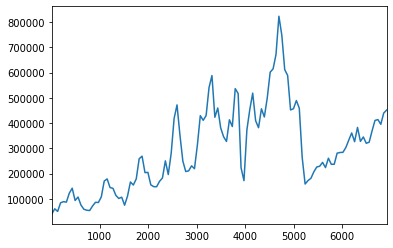

In [173]:
china_df['관광'].plot()

## 글꼴을 한글로 표현 가능하도록 하는 설정

In [175]:
from matplotlib import font_manager,rc
import platform

In [176]:
if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [177]:
df_filter = china_df

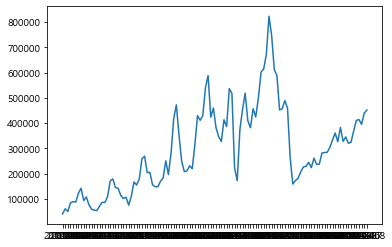

In [178]:
plt.plot(df_filter['기준년월'],df_filter['관광'])   # 첫 번째에 x축에 지정할 컬럼, 두 번째에 y축에 지정할 컬럼
plt.show()

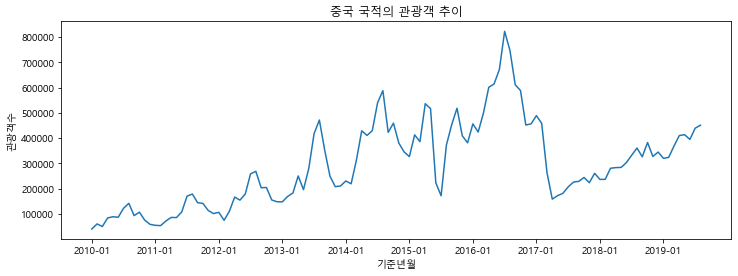

In [181]:
# 조절

plt.figure(figsize=(12,4))
plt.plot(df_filter['기준년월'],df_filter['관광'])

plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x 축 눈금 값 설정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

plt.show()

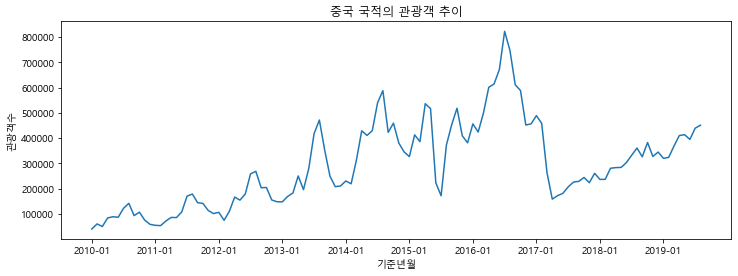

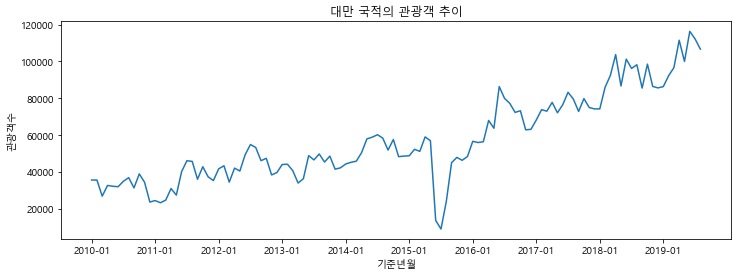

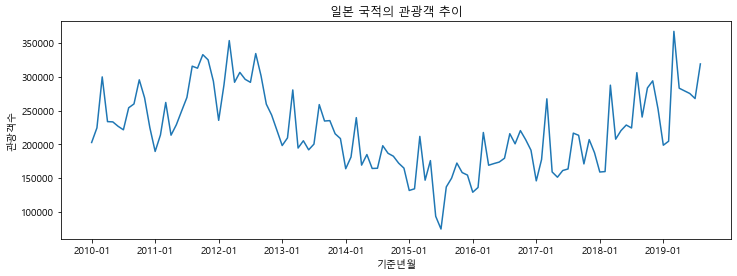

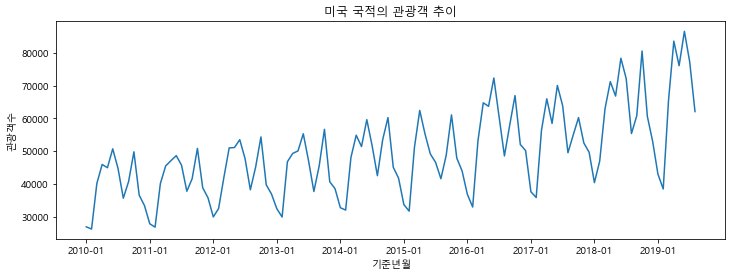

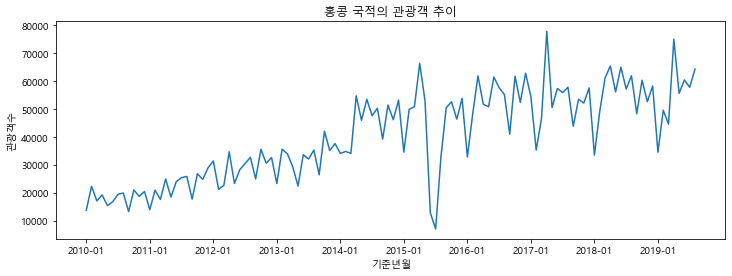

In [182]:
country_list = ['중국','대만','일본','미국','홍콩']
for count in country_list:
    df2 = df[df['국적']==count]
    plt.figure(figsize=(12,4))
    plt.plot(df2['기준년월'],df2['관광'])

    plt.title('{} 국적의 관광객 추이'.format(count))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    # x 축 눈금 값 설정
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

    plt.show()

# 히트맵 그래프 
매트릭스 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법, 전체 데이터를 한눈에 파악할 수 있음.

x축에 월,y축에 연도, 그래프 내용으로는 관광객 숫자

In [183]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [197]:
a=df.groupby('기준년월').sum()
del a['관광객 비율(%)']
a

,관광,상용,공용,유학/연수,기타,계,전체 비율(%)
기준년월,,,,,,,
2010-01,400818,22896,2738,5118,137883,569453,99.8
2010-02,446525,17544,1826,35660,137356,638911,99.7
2010-03,545442,26559,2369,17586,177938,769894,99.7
2010-04,543297,25467,3276,2997,155228,730265,100.2
2010-05,525340,24726,3490,4038,171856,729450,99.9
...,...,...,...,...,...,...,...
2019-04,1382540,14794,6914,13523,217295,1635066,99.6
2019-05,1233562,15020,6457,20702,209943,1485684,100.0
2019-06,1237840,15006,7327,23818,192227,1476218,99.9


In [198]:
df['년도'] = df['기준년월'].str.slice(0,4)     # slice를 하기위해서는 문자열로 바꿔줘야함(숫자는 슬라이스할 수 없음)
df['월'] = df['기준년월'].str.slice(5,7)
df

# str 함수는 Series의 값들을 문자형으로 바꿔주는 함수

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타,63.2,0.0,2019,08


In [199]:
cond = (df['국적']=='중국')
df_china = df[cond]
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체 비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1,2019,07


In [200]:
# 매트릭스 형태로 변환
df_pivot = df_china.pivot_table(index='년도',columns='월',values='관광')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


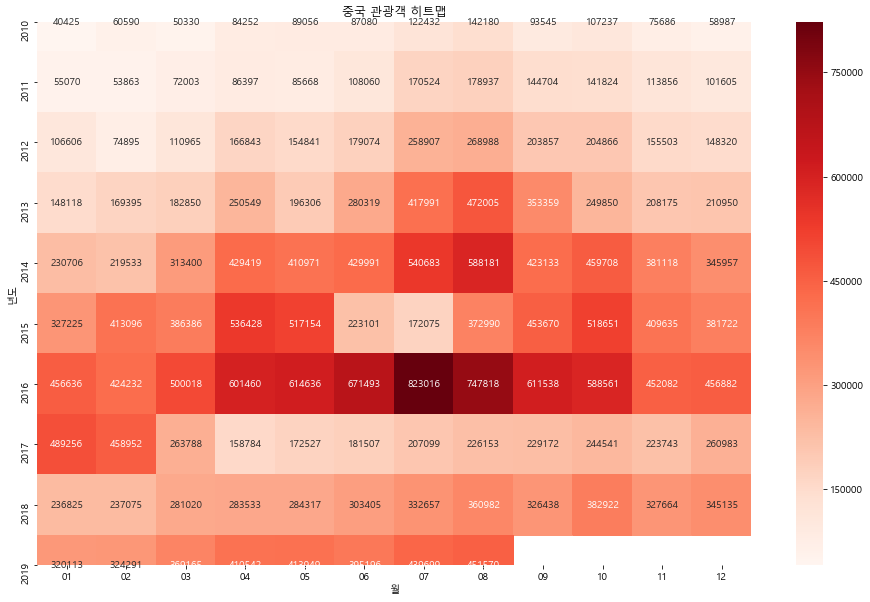

In [213]:
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot, annot=True,fmt = '.0f', cmap = 'Reds')

# annot: 실제 값을 표시할지 말지. fmt: 숫자를 나타낼 형태(.0f는 소수점이 없는 실수형), cmap: 그래프의 색깔 조합

plt.title('중국 관광객 히트맵')

plt.show()

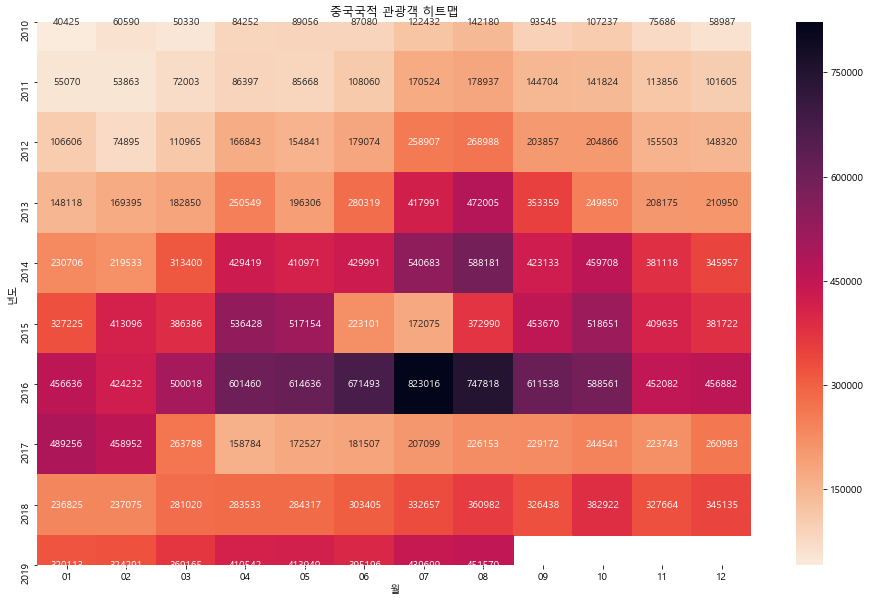

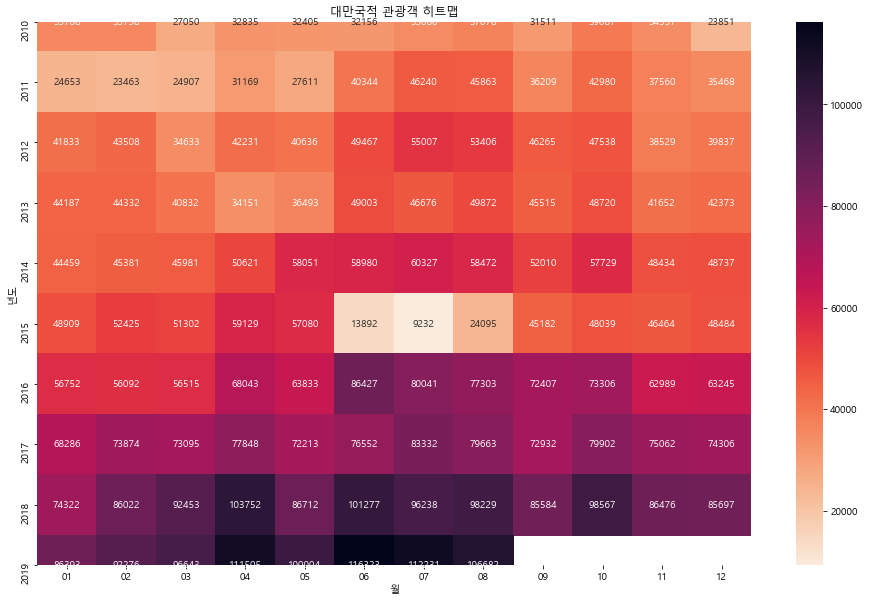

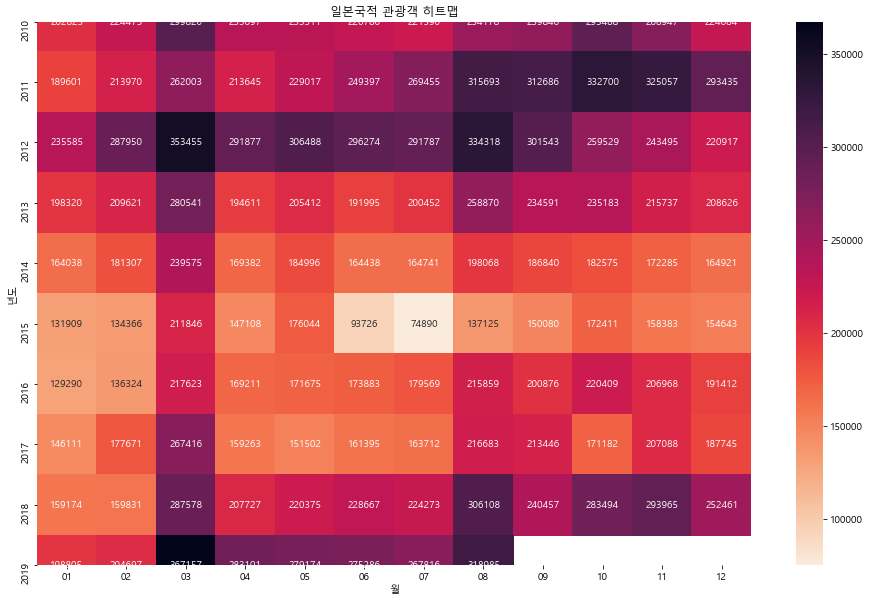

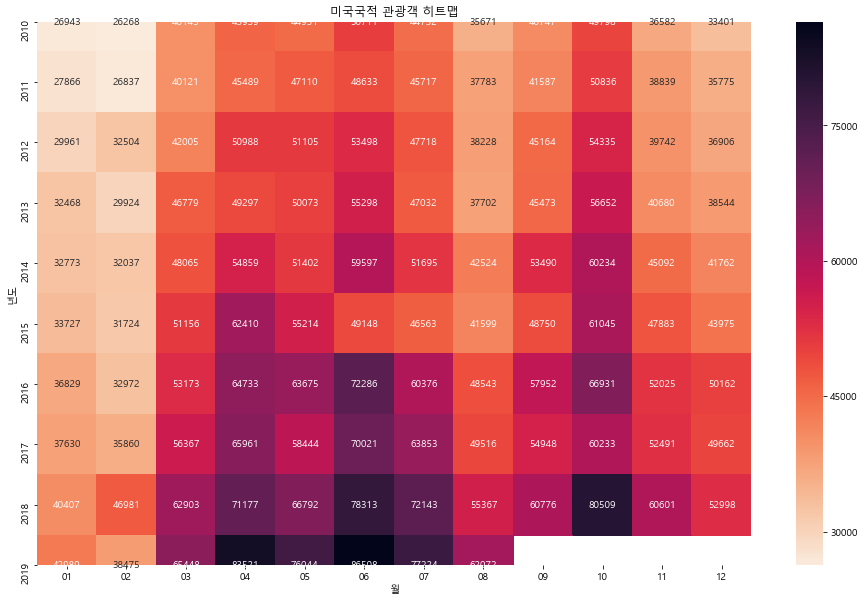

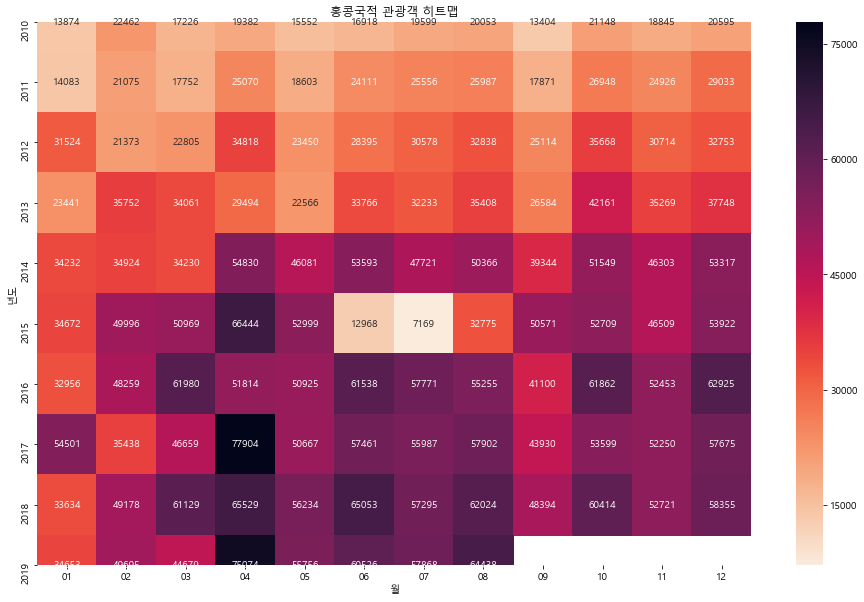

In [209]:
for count in country_list:
    cond = (df['국적']==count)
    df2 = df[cond]
    
    df3 = df2.pivot_table(index='년도',columns='월',values='관광')
    
    plt.figure(figsize=(16,10))
    sns.heatmap(df3,cmap='rocket_r',annot=True,fmt='.0f')
    plt.title('{}국적 관광객 히트맵'.format(count))
    
    plt.show()

# 시각화 해석